In [1]:
from pandas import read_csv, DataFrame,concat,notnull,isnull,Series,IndexSlice,read_excel
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [37]:
water = read_csv("subdata2010.csv")

In [38]:
water.columns

Index(['scenario_number', 'PARLIAMENT', 'SEBASTIAN', 'return_period',
       'wetland_loss', 'climate_change', 'runoff', 'bndconditions',
       'scenario_number.1', 'Pop', 'share', 'cost', 'costlog', 'logPARLIAMENT',
       'logSEBASTIAN', 'costestimated'],
      dtype='object')

In [40]:
water.ix[water.return_period==50,["PARLIAMENT","costestimated"]].describe()

,PARLIAMENT,costestimated
count,90.000000,9.000000e+01
mean,2.882968,1.694123e+10
std,0.502027,4.433611e+09
min,1.953500,9.293629e+09
25%,2.558372,1.403911e+10
50%,2.874200,1.668293e+10
75%,3.175331,1.940075e+10
max,4.316100,3.088695e+10


In [41]:
gdp_per_capita_2009=47783*12 #based on census
gdp_per_capita_2013=gdp_per_capita_2009*1.075**4 #based on census
ini_pop=2.3*10**6
gdp_2010=ini_pop*gdp_per_capita_2009

In [42]:
water["costpcGDP"] = water.costestimated/gdp_2010

In [43]:
5*10**9/gdp_2010

0.0037912943994695826

In [44]:
water.ix[(water.return_period==25)&(water.wetland_loss==0),["costpcGDP","PARLIAMENT"]]

,costpcGDP,PARLIAMENT
270,0.005114,1.5809
271,0.006339,1.8580
272,0.005659,1.6901
273,0.007205,1.9823
274,0.005401,1.6389
275,0.006896,1.9258
276,0.007037,1.9517
277,0.008492,2.2095
278,0.007658,2.0637
279,0.009444,2.3699


In [49]:
select = (water.return_period==50)&(water.wetland_loss==0)
water.ix[select,"costestimated"]/0.65

360    1.429789e+10
361    1.711907e+10
362    1.555913e+10
363    1.911524e+10
364    1.492454e+10
365    1.819521e+10
366    1.894049e+10
367    2.279524e+10
368    2.089997e+10
369    2.533866e+10
370    1.996356e+10
371    2.417075e+10
372    2.231748e+10
373    2.630112e+10
374    2.450157e+10
375    2.886555e+10
376    2.349532e+10
377    2.766196e+10
Name: costestimated, dtype: float64

In [12]:
flood2010=2.65
parlflooded=2

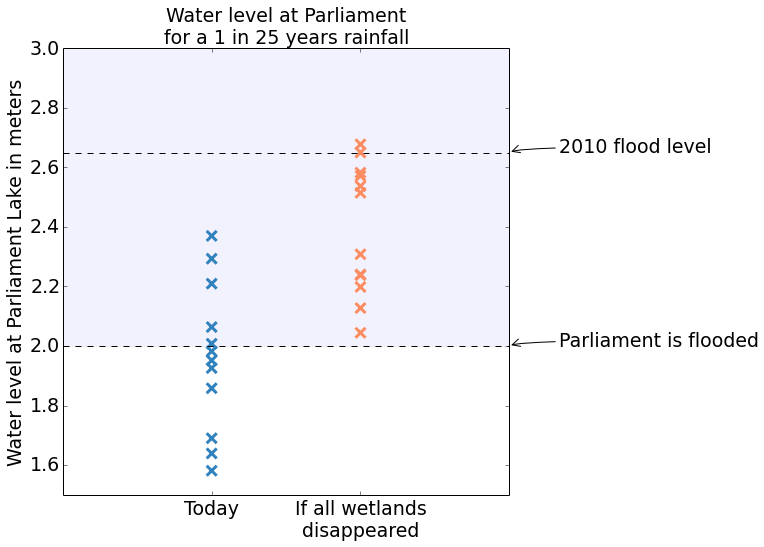

In [92]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 19}
plt.rc('font', **font)
plt.figure(figsize=(8,8))

ax=plt.subplot(111)

ax.fill_between([0,3], 2, 3,facecolor='blue',alpha=0.05)

select = (water.return_period==25)&(water.wetland_loss==0)&(water.climate_change<2)
y1=water.ix[select,"PARLIAMENT"]
plt.scatter([1]*len(y1),y1,marker='x',facecolors='none',edgecolors='#3182bd',linewidth='3',s=100,alpha=1)
select2 = (water.return_period==25)&(water.wetland_loss==100)&(water.climate_change<2)
y2=water.ix[select2,"PARLIAMENT"]
plt.scatter([2]*len(y2),y2,marker='x',facecolors='none',edgecolors='#fc8d62',linewidth='3',s=100,alpha=1)

plt.xticks([1,2])
aa = ["Today", "If all wetlands\ndisappeared"]
ax.set_xticklabels(aa)

plt.plot([0,3],[2]*2,color="black",linestyle='--')
plt.annotate('Parliament is flooded', xy=(3, 2),  xycoords='data',
                    xytext=(50, 0), textcoords='offset points',
                    size=19,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="->",
                                    fc="black", ec="black",
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )

plt.plot([0,3],[flood2010]*2,color="black",linestyle='--')
plt.annotate('2010 flood level', xy=(3, flood2010),  xycoords='data',
                    xytext=(50, 0), textcoords='offset points',
                    size=19,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="->",
                                    fc="black", ec="black",
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )

plt.title("Water level at Parliament\nfor a 1 in 25 years rainfall",fontsize=19)
plt.ylabel("Water level at Parliament Lake in meters")

ax.set_xlim([0,3])
ax.set_ylim([1.5,3])

plt.savefig("ppt/parliament_today.png",bbox_inches="tight",dpi=400)

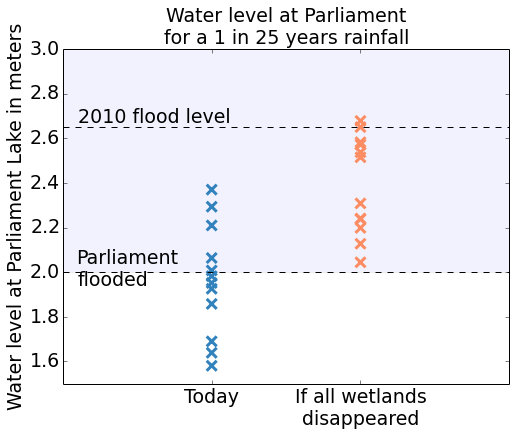

In [105]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 19}
plt.rc('font', **font)
plt.figure(figsize=(8,6))

ax=plt.subplot(111)

ax.fill_between([0,3], 2, 3,facecolor='blue',alpha=0.05)

select = (water.return_period==25)&(water.wetland_loss==0)&(water.climate_change<2)
y1=water.ix[select,"PARLIAMENT"]
plt.scatter([1]*len(y1),y1,marker='x',facecolors='none',edgecolors='#3182bd',linewidth='3',s=100,alpha=1)
select2 = (water.return_period==25)&(water.wetland_loss==100)&(water.climate_change<2)
y2=water.ix[select2,"PARLIAMENT"]
plt.scatter([2]*len(y2),y2,marker='x',facecolors='none',edgecolors='#fc8d62',linewidth='3',s=100,alpha=1)

plt.xticks([1,2])
aa = ["Today", "If all wetlands\ndisappeared"]
ax.set_xticklabels(aa)

plt.plot([0,3],[2]*2,color="black",linestyle='--')
plt.annotate('Parliament\nflooded', xy=(0.1, 1.94))

plt.plot([0,3],[flood2010]*2,color="black",linestyle='--')
plt.annotate('2010 flood level', xy=(0.1, flood2010+0.02))

plt.title("Water level at Parliament\nfor a 1 in 25 years rainfall",fontsize=19)
plt.ylabel("Water level at Parliament Lake in meters")

ax.set_xlim([0,3])
ax.set_ylim([1.5,3])

plt.savefig("ppt/parliament_today_paper.png",bbox_inches="tight",dpi=400)

In [14]:
47783*12

573396

In [81]:
water.ix[select,"costestimated"].values/0.65/gdp_2010

array([ 0.00786765,  0.00975213,  0.00870548,  0.01108457,  0.00830907,
        0.01060945,  0.01082637,  0.01306513,  0.01178141,  0.01452865,
        0.01130046,  0.01382407])

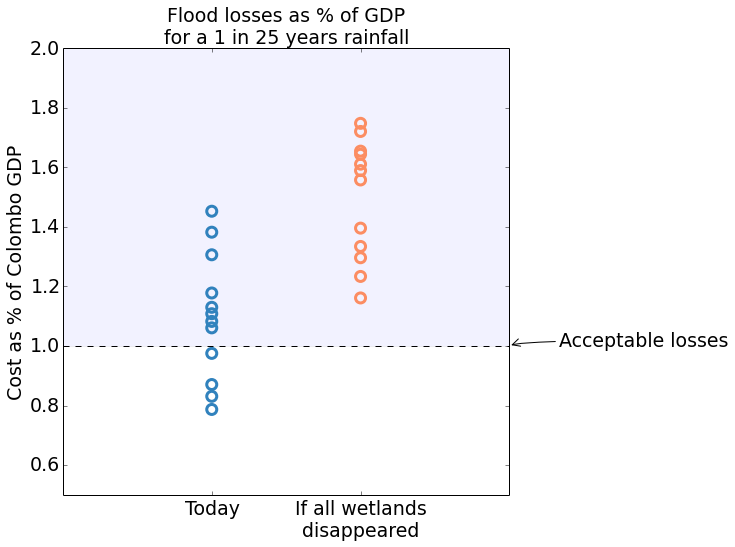

In [91]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 19}
plt.rc('font', **font)
plt.figure(figsize=(8,8))

ax=plt.subplot(111)

ax.fill_between([0,3], 1, 2,facecolor='blue',alpha=0.05)

select = (water.return_period==25)&(water.wetland_loss==0)&(water.climate_change<2)
y1=100*water.ix[select,"costestimated"]/0.65/gdp_2010
plt.scatter([1]*len(y1),y1,marker='o',facecolors='none',edgecolors='#3182bd',linewidth='3',s=100,alpha=1)
select2 = (water.return_period==25)&(water.wetland_loss==100)&(water.climate_change<2)
y2=100*water.ix[select2,"costestimated"]/0.65/gdp_2010
plt.scatter([2]*len(y2),y2,marker='o',facecolors='none',edgecolors='#fc8d62',linewidth='3',s=100,alpha=1)

plt.xticks([1,2])
aa = ["Today", "If all wetlands\ndisappeared"]
ax.set_xticklabels(aa)

plt.plot([0,3],[1]*2,color="black",linestyle='--')
plt.annotate('Acceptable losses', xy=(3, 1),  xycoords='data',
                    xytext=(50, 0), textcoords='offset points',
                    size=19,
                    #bbox=dict(boxstyle="round", fc="0.8"),
                    arrowprops=dict(arrowstyle="->",
                                    fc="black", ec="black",
                                    patchB=None,
                                    connectionstyle="angle3,angleA=0,angleB=40"),
                        )


plt.title("Flood losses as % of GDP\nfor a 1 in 25 years rainfall",fontsize=19)

plt.ylabel("Cost as % of Colombo GDP")

ax.set_xlim([0,3])
ax.set_ylim([0.5,2])

plt.savefig("ppt/parliament_today_losses.png",bbox_inches="tight",dpi=400)

(0.5, 2)

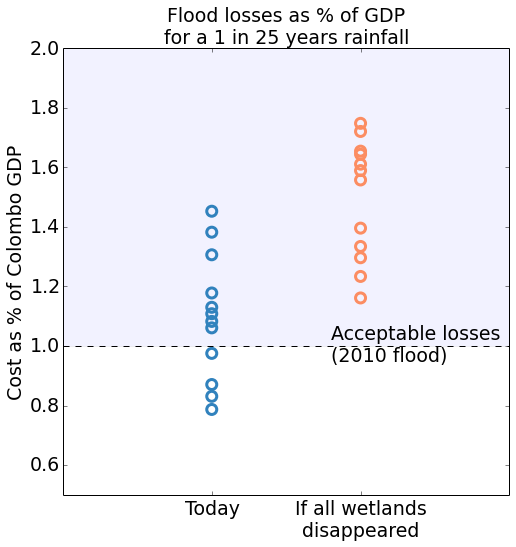

In [113]:
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'normal',
        'size'   : 19}
plt.rc('font', **font)
plt.figure(figsize=(8,8))

ax=plt.subplot(111)

ax.fill_between([0,3], 1, 2,facecolor='blue',alpha=0.05)

select = (water.return_period==25)&(water.wetland_loss==0)&(water.climate_change<2)
y1=100*water.ix[select,"costestimated"]/0.65/gdp_2010
plt.scatter([1]*len(y1),y1,marker='o',facecolors='none',edgecolors='#3182bd',linewidth='3',s=100,alpha=1)
select2 = (water.return_period==25)&(water.wetland_loss==100)&(water.climate_change<2)
y2=100*water.ix[select2,"costestimated"]/0.65/gdp_2010
plt.scatter([2]*len(y2),y2,marker='o',facecolors='none',edgecolors='#fc8d62',linewidth='3',s=100,alpha=1)

plt.xticks([1,2])
aa = ["Today", "If all wetlands\ndisappeared"]
ax.set_xticklabels(aa)

plt.plot([0,3],[1]*2,color="black",linestyle='--')
plt.annotate('Acceptable losses\n(2010 flood)', xy=(1.8, 0.95))


plt.title("Flood losses as % of GDP\nfor a 1 in 25 years rainfall",fontsize=19)

plt.ylabel("Cost as % of Colombo GDP")

ax.set_xlim([0,3])
ax.set_ylim([0.5,2])

#plt.savefig("ppt/parliament_today_losses_paper.png",bbox_inches="tight",dpi=400)